In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
## statistical info
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
## datatype info
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


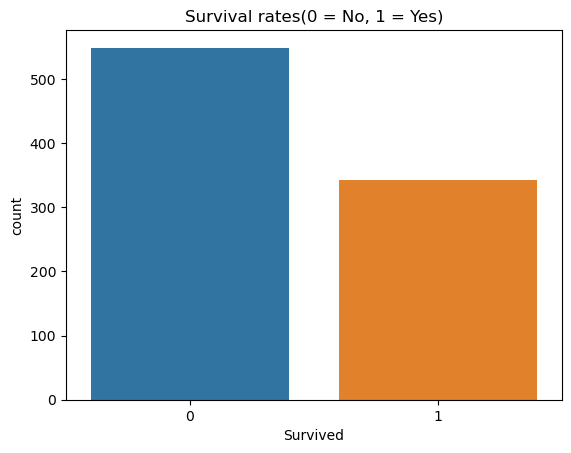

In [8]:
## categorical attributes
sns.countplot(x='Survived',data=train)
plt.title('Survival rates(0 = No, 1 = Yes)')
plt.show()

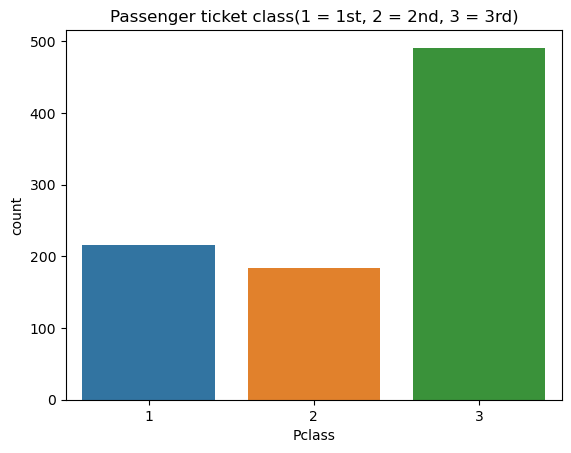

In [11]:
sns.countplot(x='Pclass',data=train)
plt.title('Passenger ticket class(1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.show()

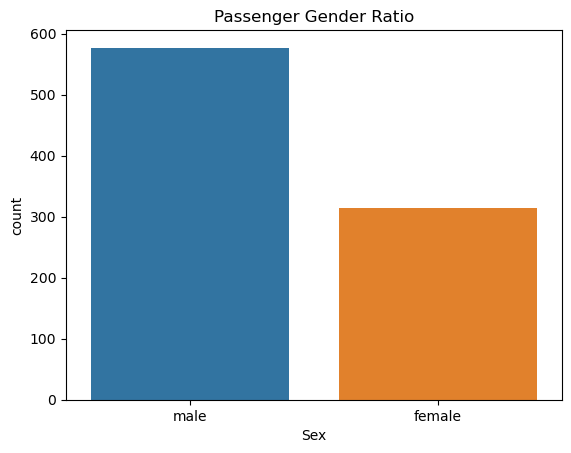

In [12]:
sns.countplot(x='Sex',data=train)
plt.title('Passenger Gender Ratio')
plt.show()

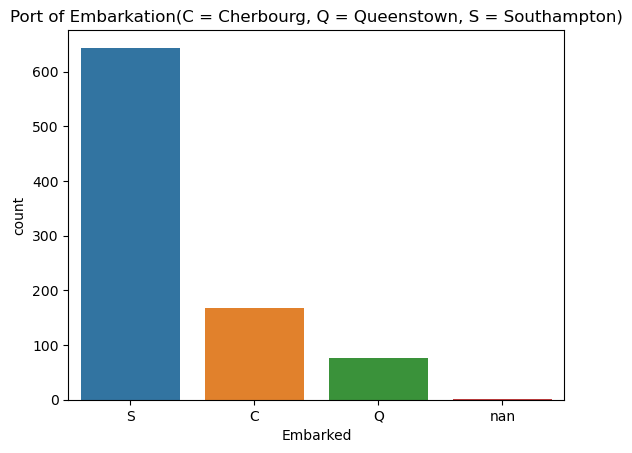

In [15]:
train=train.astype({'Embarked':str})
sns.countplot(x='Embarked',data=train)
plt.title('Port of Embarkation(C = Cherbourg, Q = Queenstown, S = Southampton)')
plt.show()

In [16]:
df=train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
clean={'Sex':{'male':0,'female':1}
    }
df=df.replace(clean)
df=df.fillna({'Age':df['Age'].mean()})
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [17]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)
Xtrain.shape

(712, 6)

In [18]:
Xtest.shape

(179, 6)

In [19]:
from sklearn.ensemble import RandomForestClassifier
m=RandomForestClassifier()
m.fit(Xtrain,ytrain)
ytpred=m.predict(Xtrain)
ypred=m.predict(Xtest)
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

trac=accuracy_score(ytrain,ytpred)
tsac=accuracy_score(ytest,ypred)
print("Training Accuracy:",trac)
print("Testing Accuracy:",tsac)

Training Accuracy: 0.9817415730337079
Testing Accuracy: 0.8156424581005587


In [20]:
cr=classification_report(ytest,ypred)
print("Testing classification report:\n",cr)

Testing classification report:
               precision    recall  f1-score   support

           0       0.82      0.90      0.86       110
           1       0.81      0.68      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.82      0.81       179



[[99 11]
 [22 47]]


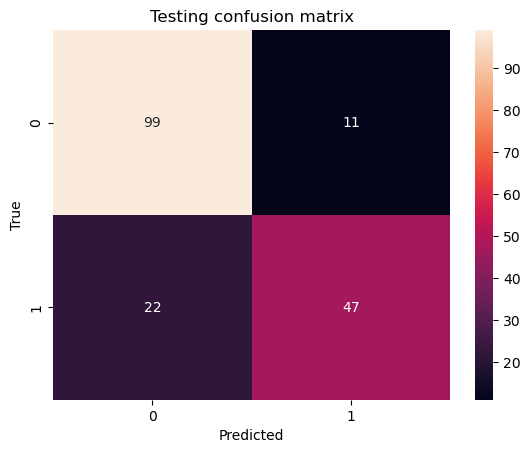

In [21]:
cm=confusion_matrix(ytest,ypred)
print(cm)
sns.heatmap(data=cm,annot=True)
plt.title('Testing confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()